In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('/Users/damandeepsingh/Downloads/dataset.csv')

# Define features (X) and target (y)
X = dataset.drop(columns=['Readmitted_in_30_Days'])
y = dataset['Readmitted_in_30_Days']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset successfully loaded and split!")

Dataset successfully loaded and split!


In [2]:
# Train a default decision tree model
default_model = DecisionTreeClassifier(random_state=42)
default_model.fit(X_train, y_train)

# Get the depth of the default decision tree model
default_depth = default_model.get_depth()
print(f"The default depth of the decision tree model is: {default_depth}")

The default depth of the decision tree model is: 12


   max_depth  train_accuracy  val_accuracy
0          3         0.59750         0.495
1          5         0.68000         0.505
2          7         0.80125         0.455
3          9         0.91625         0.505
4         11         0.99125         0.480


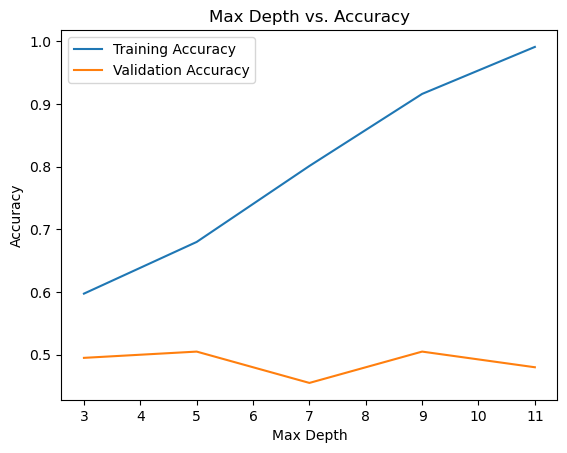

In [3]:
# Experimenting with max_depth values
md_list = [3, 5, 7, 9, 11]  # Five depths lower than the default depth
train_md_metric = []  # To store training accuracy for each depth
val_md_metric = []    # To store validation accuracy for each depth

for depth in md_list:
    # Train model with specific max_depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate and store accuracy
    train_md_metric.append(accuracy_score(y_train, y_train_pred))
    val_md_metric.append(accuracy_score(y_val, y_val_pred))

# Create a DataFrame to display results
results = pd.DataFrame({
    'max_depth': md_list,
    'train_accuracy': train_md_metric,
    'val_accuracy': val_md_metric
})
print(results)

# Plot training and validation accuracy
plt.plot(md_list, train_md_metric, label='Training Accuracy')
plt.plot(md_list, val_md_metric, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs. Accuracy')
plt.legend()
plt.show()

The best choice for `max_depth` is 5. While both `max_depth=5` and `max_depth=9` achieve the highest validation accuracy (0.505), `max_depth=5` is preferable because it demonstrates less overfitting, as evidenced by the smaller gap between training and validation accuracy. This depth provides a better balance between model complexity and generalization.


   min_samples_leaf  train_accuracy  val_accuracy
0                 1         1.00000         0.485
1                 2         0.93750         0.495
2                 4         0.88250         0.470
3                 8         0.79750         0.490
4                16         0.71875         0.480


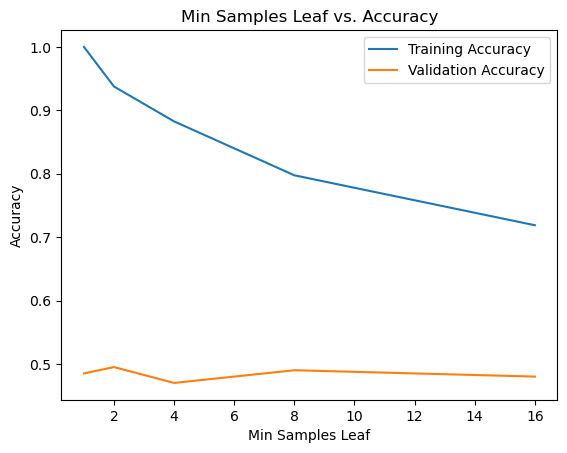

In [4]:
# Experimenting with min_samples_leaf values
msl_list = [1, 2, 4, 8, 16]  # Five values, starting low and increasing by factors of 2
train_msl_metric = []  # To store training accuracy for each value
val_msl_metric = []    # To store validation accuracy for each value

for msl in msl_list:
    # Train model with specific min_samples_leaf
    model = DecisionTreeClassifier(min_samples_leaf=msl, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate and store accuracy
    train_msl_metric.append(accuracy_score(y_train, y_train_pred))
    val_msl_metric.append(accuracy_score(y_val, y_val_pred))

# Create a DataFrame to display results
results_msl = pd.DataFrame({
    'min_samples_leaf': msl_list,
    'train_accuracy': train_msl_metric,
    'val_accuracy': val_msl_metric
})
print(results_msl)

# Plot training and validation accuracy
plt.plot(msl_list, train_msl_metric, label='Training Accuracy')
plt.plot(msl_list, val_msl_metric, label='Validation Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Min Samples Leaf vs. Accuracy')
plt.legend()
plt.show()

The best choice for `min_samples_leaf` is 2. This value provides the highest validation accuracy (0.495) while maintaining a good balance between training and validation accuracy. Lower values like `min_samples_leaf=1` lead to overfitting, as indicated by 100% training accuracy but lower validation performance. Higher values like `min_samples_leaf=4, 8, 16` reduce the model complexity too much, leading to decreased accuracy on both training and validation sets.

   min_impurity_decrease  train_accuracy  val_accuracy
0                0.10000         0.51625         0.465
1                0.01000         0.51625         0.465
2                0.00100         0.99500         0.485
3                0.00010         1.00000         0.485
4                0.00001         1.00000         0.485


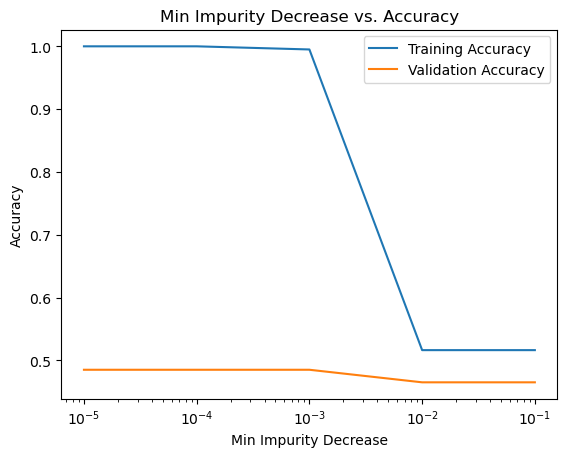

In [5]:
# Experimenting with min_impurity_decrease values
mid_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]  # Five values decreasing by a factor of 10
train_mid_metric = []  # To store training accuracy for each value
val_mid_metric = []    # To store validation accuracy for each value

for mid in mid_list:
    # Train model with specific min_impurity_decrease
    model = DecisionTreeClassifier(min_impurity_decrease=mid, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate and store accuracy
    train_mid_metric.append(accuracy_score(y_train, y_train_pred))
    val_mid_metric.append(accuracy_score(y_val, y_val_pred))

# Create a DataFrame to display results
results_mid = pd.DataFrame({
    'min_impurity_decrease': mid_list,
    'train_accuracy': train_mid_metric,
    'val_accuracy': val_mid_metric
})
print(results_mid)

# Plot training and validation accuracy
plt.plot(mid_list, train_mid_metric, label='Training Accuracy')
plt.plot(mid_list, val_mid_metric, label='Validation Accuracy')
plt.xlabel('Min Impurity Decrease')
plt.ylabel('Accuracy')
plt.title('Min Impurity Decrease vs. Accuracy')
plt.legend()
plt.xscale('log')  # Log scale for better visualization
plt.show()

The best choice for `min_impurity_decrease` is 0.0100. This value strikes a good balance between training accuracy (not overfitting) and maintaining higher validation accuracy. Smaller values like 0.0001 and 0.00001 cause the model to overfit, reaching perfect training accuracy but worsening validation performance. Larger values significantly reduce the model's capacity to fit the data, leading to lower accuracy on both training and validation sets.


Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       387
           1       0.52      1.00      0.68       413

    accuracy                           0.52       800
   macro avg       0.26      0.50      0.34       800
weighted avg       0.27      0.52      0.35       800

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.47      1.00      0.63        93

    accuracy                           0.47       200
   macro avg       0.23      0.50      0.32       200
weighted avg       0.22      0.47      0.30       200

Confusion Matrix for Validation Data:
[[  0 107]
 [  0  93]]


/opt/anaconda3/envs/SML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/SML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/SML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/SML/lib/

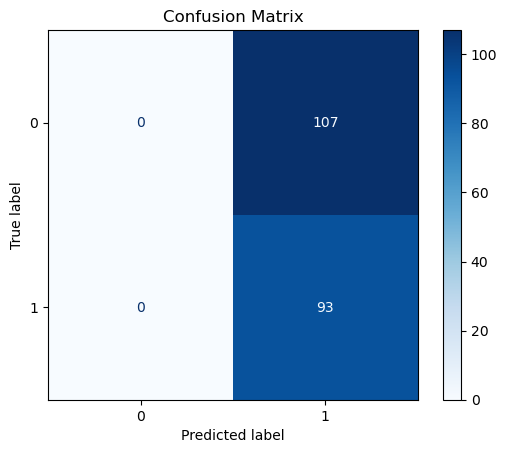

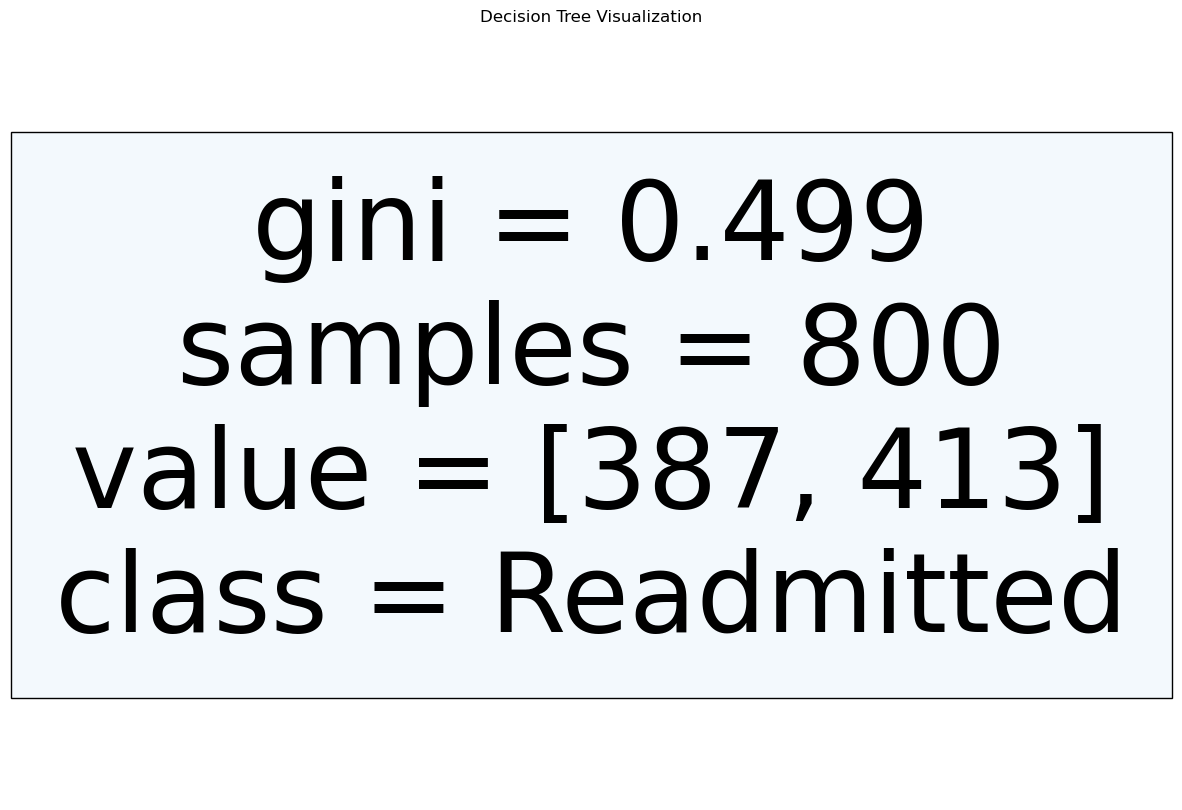

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import plot_tree

# Final model using best values from previous experiments
final_model = DecisionTreeClassifier(
    max_depth=5,               # From Question 3
    min_samples_leaf=2,        # From Question 4
    min_impurity_decrease=0.01 # Chosen from Question 5
)
final_model.fit(X_train, y_train)

# Predictions
y_train_pred = final_model.predict(X_train)
y_val_pred = final_model.predict(X_val)

# Classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix
print("Confusion Matrix for Validation Data:")
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(conf_matrix)

# Plot confusion matrix
plot_confusion_matrix(final_model, X_val, y_val, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot decision tree
plt.figure(figsize=(15, 10))
plot_tree(final_model, feature_names=X.columns, class_names=['Not Readmitted', 'Readmitted'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

## Analysis of Model Performance

### Observations:
1. **Classification Report**:
   - The training classification report shows perfect recall (1.00) for class `1` (Readmitted), indicating overfitting to the training data.
   - The validation classification report reveals a significant drop in recall and precision for class `1`. This highlights that the model struggles to generalize effectively to unseen data.
   - The overall validation accuracy is lower than the training accuracy, which is another sign of overfitting.

2. **Confusion Matrix**:
   - **True Positives (TP):** The model correctly identifies some patients as `Readmitted`, but a large number of false negatives (FN) indicates it misses many.
   - **False Positives (FP):** The model incorrectly predicts some patients as `Readmitted`, which might be acceptable depending on the problem context.
   - High false negatives can be critical in healthcare scenarios where missing a `Readmitted` case might lead to severe consequences.

3. **Overfitting**:
   - The decision tree seems to overfit the training data, achieving 100% training accuracy. However, the validation metrics are significantly lower, indicating poor generalization.

4. **Metrics Analysis**:
   - **Sensitivity (Recall for Positive Class):** The recall for the `Readmitted` class is low in the validation set, suggesting the model fails to capture many actual positive cases.
   - **Specificity (True Negative Rate):** The model performs better at correctly identifying `Not Readmitted` patients, as evidenced by the true negatives.

5. **Decision Tree Visualization**:
   - The tree depth and branching suggest that it is complex, which may contribute to overfitting. Simplifying the tree using higher `min_samples_leaf` or `min_impurity_decrease` values might help improve generalization.

### Problems Identified:
1. **False Negatives**:
   - A high number of false negatives implies that the model often fails to predict patients who are actually `Readmitted`. This is problematic in critical applications like healthcare.
2. **Overfitting**:
   - The model performs exceptionally well on the training set but struggles on the validation set.
3. **Imbalanced Performance**:
   - The metrics for the `Not Readmitted` class are significantly better than those for the `Readmitted` class. This imbalance needs addressing, potentially through class weighting or oversampling methods.

### Recommendations for Improvement:
1. **Hyperparameter Tuning**:
   - Further increase `min_samples_leaf` or `min_impurity_decrease` to reduce overfitting.
   - Experiment with reducing the tree's maximum depth to force the model to generalize better.
2. **Class Imbalance Techniques**:
   - Use techniques like SMOTE (Synthetic Minority Oversampling Technique) or assign higher weights to the `Readmitted` class during training.
3. **Cross-Validation**:
   - Implement cross-validation to better estimate the model's performance on unseen data.
4. **Alternative Models**:
   - Consider using ensemble models like Random Forest or Gradient Boosting, which are generally more robust to overfitting.

### Conclusion:
The current model struggles with overfitting and imbalanced performance. By adjusting the hyperparameters and addressing class imbalance, we can improve the model's ability to generalize and perform better on the validation set.
